0th feature info gain is : 0.083
1th feature info gain is : 0.324
2th feature info gain is : 0.420
3th feature info gain is : 0.363
current bestFeature is :house
0th feature info gain is : 0.252
1th feature info gain is : 0.918
2th feature info gain is : 0.474
current bestFeature is :job
{'house': {0: {'job': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


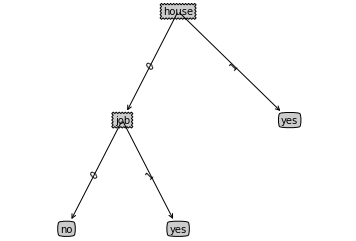

loan
{'house': {0: {'job': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


In [6]:
import matplotlib.pyplot as plt
from math import log
import operator
import pickle
'''
Function : createDataSet()
    Description : to createDataSet for user loan info
    Args : None
    Rets : featureMatrix, labels
'''

def createDataSet():
    #featureMatrix info age, job, house, loanInfo
    featureMatrix = [
        [0, 0, 0, 0, 'no'],
        [0, 0, 0, 1, 'no'],
        [0, 1, 0, 1, 'yes'],
        [0, 1, 1, 0, 'yes'],
        [0, 0, 0, 0, 'no'],
        [1, 0, 0, 0, 'no'],
        [1, 0, 0, 1, 'no'],
        [1, 1, 1, 1, 'yes'],
        [1, 0, 1, 2, 'yes'],
        [1, 0, 1, 2, 'yes'],
        [2, 0, 1, 2, 'yes'],
        [2, 0, 1, 1, 'yes'],
        [2, 1, 0, 1, 'yes'],
        [2, 1, 0, 2, 'yes'],
        [2, 0, 0, 0, 'no']
    ]
    labels = ['age', 'job', 'house', 'loanInfo']
    return featureMatrix, labels

'''
Function : shannonEntropy(dataSet)
    Description : to calculate the shannon entropy of dataSet
    Args : dataSet
    Rets : H #shannon entropy
'''
def shannonEntropy(featureMatrix):
    rows = len(featureMatrix)
    labels = {}
    #frequency statistics
    for row in featureMatrix:
        label = row[-1]
        if label not in labels.keys():
            labels[label] = 0
        labels[label] += 1
    H = 0.0
    for i in labels:
        p_xi = float(labels[i]) / rows
        H -= p_xi * log(p_xi, 2)
    return H
'''
Function : splitDataSet(featureMatrix, axis, value)
    Description : to splict dataset with axis subvector when value in axis
    Args :  featureMatrix
            axis
            value
    Rets : subDataSet
'''
def splitDataSet(featureMatrix, axis, value):
    subDataSet = []
    for row in featureMatrix:
        #get the feature set except feature itself
        if row[axis] == value:
            reducedFeature = row[:axis]
            reducedFeature.extend(row[axis+1:])
            subDataSet.append(reducedFeature)
    return subDataSet
'''
Function : maxEntropy(featureMatix)
    Description : to get the max entropy
    Args : featureMatrix
    Rets : bestFeature
'''
def maxEntropy(featureMatrix):
    #get numFeature
    numFeature = len(featureMatrix[0]) - 1
    baseEntropy = shannonEntropy(featureMatrix)
    maxInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeature):
        featureList = [row[i] for row in featureMatrix]
        uniqueValues = set(featureList)
        newEntropy = 0.0
        #calculate every value's entropy
        for value in uniqueValues:
            subDataSet = splitDataSet(featureMatrix, i, value)
            p_i = len(subDataSet) / float(len(featureMatrix))
            newEntropy += p_i * shannonEntropy(subDataSet)
        infoGain = baseEntropy - newEntropy
        print('%dth feature info gain is : %.3f'%(i, infoGain))
        #update maxInfoGain and bestFature
        if(infoGain > maxInfoGain):
            maxInfoGain = infoGain
            bestFeature = i
    return bestFeature

'''
Function : majorityCount(classList)
    Description : to count majority class
    Args : classList
    Rets : sortedClassList[0][0]
'''
def majorityCount(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    #get the max frequency bestFeature and value
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

'''
Function : createTree(featureMatrix, labels, featureLabels)
    Description : to create tree structure with featureMatrix
    Args :  featureMatrix
            labels 
            featureMatrixLabels
    Rets :  dTree
'''
def createTree(featureMatrix, labels, featureLabels):
    #get loanInfo
    classList = [row[-1] for row in featureMatrix]
    #if feature is all in classList return
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #if the class has not been classified, return max frequency result
    if len(featureMatrix[0]) == 1 or len(labels) == 0:
        return majorityCount(classList)
    bestFeature = maxEntropy(featureMatrix)
    bestFeatureLabel = labels[bestFeature]
    print('current bestFeature is :' + bestFeatureLabel)
    featureLabels.append(bestFeatureLabel)
    dTree = {bestFeatureLabel:{}}
    del(labels[bestFeature])
    #get the bestFeature value form featureMatrix
    featureValue = [row[bestFeature] for row in featureMatrix]
    #ignore the repeat value
    uniqueValues = set(featureValue)
    #traverse the feature value to create the tree
    for value in uniqueValues:
        dTree[bestFeatureLabel][value] = createTree(splitDataSet(featureMatrix, bestFeature, value), labels, featureLabels)
    return dTree

'''
Function : getNumLeaf(dTree)
    Description : to get number of lead in dTree
    Args : dTree
    Rets : numLeafs
'''
def getNumLeaf(dTree):
    numLeafs = 0
    firstStr = next(iter(dTree))
    secondDict = dTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeaf(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

'''
Function : getTreeDepth(dTree)
    Description : to get the depth of dTree
    Args : dTree
    Rets : depth
'''
def getTreeDepth(dTree):
    depth = 0.0
    firstStr = next(iter(dTree))
    secondDict = dTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > depth:
            depth = thisDepth
    return depth

'''
Function : plotNode(nodeText, nodePositon, arrowPosition, nodeType)
    Description : to set dTree node property
    Args : nodeText
            textPosition
            arrowPosition
            nodtType
    Rets : None
'''
def plotNode(nodeText, textPosition, arrowPosition, nodeType):
    arrow_args = dict(arrowstyle = '<-')
    createPlot.ax1.annotate(nodeText, xy = arrowPosition, xycoords = 'axes fraction',
                             xytext = textPosition, textcoords = 'axes fraction',
                              va = 'center', ha = 'center',bbox = nodeType, arrowprops = arrow_args)
'''
Function : plotMidText(startPosition, endPosition, text)
    Description : to set position for text
    Args : startPosition
            endPosition
            text
    Rets : None
'''
def plotMidText(startPosition, endPosition, text):
    xmid = (endPosition[0] - startPosition[0]) / 2.0 + startPosition[0]
    ymid = (endPosition[1] - startPosition[1]) / 2.0 + startPosition[1]
    createPlot.ax1.text(xmid, ymid, text, va = 'center', ha = 'center', rotation = 45)

'''
Function : plotTree(dTree, arrowPosition, text)
    Description : to plot the dTree
    Args : dTree
            arrowPosition
            text
    Rets : None
'''
def plotTree(dTree, arrowPosition, text):
    dNode = dict(boxstyle = 'sawtooth', fc = '0.8')
    leafNode = dict(boxstyle = 'round4', fc = '0.8')
    numLeafs = getNumLeaf(dTree)
    depth = getTreeDepth(dTree)
    firstStr = next(iter(dTree))
    startPosition = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(startPosition, arrowPosition, text)
    plotNode(firstStr, startPosition, arrowPosition, dNode)
    secondDict = dTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():                               
        if type(secondDict[key]).__name__=='dict':                                           
            plotTree(secondDict[key],startPosition,str(key))                                        
        else:                                                                               
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), startPosition, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), startPosition, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

'''
Function : createPlot(dTree)
    Description : to use plt plot dTree figure
    Args : dTree
    Rets : None
'''
def createPlot(dTree):
    fig = plt.figure(1, facecolor='white')                                                   
    fig.clf()                                                                                
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)                                
    plotTree.totalW = float(getNumLeaf(dTree))                                          
    plotTree.totalD = float(getTreeDepth(dTree))                                        
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;                           
    plotTree(dTree, (0.5,1.0), '')
    plt.show()       
'''
Function : train(x, dTree, featureLabels)
    Description : to classfity x into dTree
    Args : x
            dTree
            featureLabels
    Rets : predictLabel
'''
def train(x, dTree, featureLabels):
    firstStr = next(iter(dTree))
    secondDict = dTree[firstStr]
    featureIndex = featureLabels.index(firstStr)
    for key in secondDict.keys():
        if x[featureIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                predictLabel = train(x, secondDict[key], featureLabels)
            else:
                predictLabel = secondDict[key]
    return predictLabel
'''
Function : saveTree('dTree.txt', dTree)
    Description : to save dTree as pickle file(in memory)
    Args : 'dTree.txt'
            dTree
    Rets : None
'''
def saveTree(inTree, filename):
    with open(filename, 'wb') as fw:
        pickle.dump(inTree, fw)
'''
Function : loadTree(filename)
    Description : to loadTree from txt %%file
    Args : filename
    Rets : pickle.load(filename)
'''
def loadTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)


if __name__ == '__main__':
    featureMatrix, labels = createDataSet()
    #print('maxEntropy feature is : ' + str(maxEntropy(featureMatrix)))
    featureLabels = []
    dTree = createTree(featureMatrix, labels, featureLabels)
    print(dTree)
    #print(featureLabels)
    createPlot(dTree)
    x = [0,1]
    predictLabel = train(x, dTree, featureLabels)
    if predictLabel ==  'yes':
        print('loan')
    else:
        print('unloan')
    saveTree(dTree, 'dTree.txt')
    tree = loadTree('dTree.txt')
    print(tree)

shannon entropy:
$$
    H = -\sum_{i = 1}^{n}p(x_i)\times log_2(p(x_i))
$$

[0 1 2 3 4 5]
[0 1 2]
[0, 1, 2, 3, 4, 5]
